In [1]:
import glob
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset

#using numpy
import numpy as np

#for data load or save
import pandas as pd

#visualize some datasets
import matplotlib.pyplot as plt

#check our work directory
import os

In [23]:
lr = 0.001 # learning_rate
batch_size = 100 # we will use mini-batch method
epochs = 10 # How much to train a model

In [59]:
class dataset(torch.utils.data.Dataset):
    
    def __init__(self,file_list,transform=None):
        self.file_list = file_list
        self.transform = transform
        
        
    #dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength
    
    #load an one of images
    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        #print(img_path)
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        
        label = img_path.split('/')[-1].split('.')[1]
        if label == 'brown_bears':
            label=1
        elif label == 'polar_bears':
            label=0
        #print(label)  
            
        return img_transformed,label

In [60]:
images_list = []
images_list = glob.glob(os.path.join('dataset/dataset_random_name','*.jpg'))
train_list = images_list[0 : int(len(images_list)*0.8)]
test_list = images_list[int(len(images_list)*0.8) : int(len(images_list)*0.9)]
val_list = images_list[int(len(images_list)*0.9) : int(len(images_list))]

In [61]:
print(len(images_list))
print(images_list[:5])
    
print(len(train_list))
print(train_list[:5])
    
print(len(test_list))
print(test_list[:5])
    
print(len(val_list))
print(val_list[:5])

2085
['dataset/dataset_random_name\\00001.polar_bears.jpg', 'dataset/dataset_random_name\\00012.brown_bears.jpg', 'dataset/dataset_random_name\\00015.brown_bears.jpg', 'dataset/dataset_random_name\\00018.brown_bears.jpg', 'dataset/dataset_random_name\\00019.polar_bears.jpg']
1668
['dataset/dataset_random_name\\00001.polar_bears.jpg', 'dataset/dataset_random_name\\00012.brown_bears.jpg', 'dataset/dataset_random_name\\00015.brown_bears.jpg', 'dataset/dataset_random_name\\00018.brown_bears.jpg', 'dataset/dataset_random_name\\00019.polar_bears.jpg']
208
['dataset/dataset_random_name\\08065.polar_bears.jpg', 'dataset/dataset_random_name\\08070.brown_bears.jpg', 'dataset/dataset_random_name\\08071.polar_bears.jpg', 'dataset/dataset_random_name\\08080.brown_bears.jpg', 'dataset/dataset_random_name\\08084.brown_bears.jpg']
209
['dataset/dataset_random_name\\09081.polar_bears.jpg', 'dataset/dataset_random_name\\09083.brown_bears.jpg', 'dataset/dataset_random_name\\09084.brown_bears.jpg', 'datas

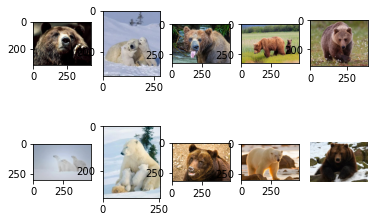

In [62]:
random_idx = np.random.randint(1,len(images_list),size=10)

fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = Image.open(images_list[idx])
    plt.imshow(img)
    i+=1

plt.axis('off')
plt.show()

In [63]:
print(train_list[0].split('/')[1].split('.')[1])

polar_bears


In [64]:
train_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

val_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

test_transforms = transforms.Compose([   
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    
train_data = dataset(train_list, transform=train_transforms)
test_data = dataset(test_list, transform=test_transforms)
val_data = dataset(val_list, transform=val_transforms)

In [65]:
print(train_data[1])

(tensor([[[0.1176, 0.1176, 0.1137,  ..., 0.1216, 0.1216, 0.1216],
         [0.1176, 0.1176, 0.1137,  ..., 0.1216, 0.1216, 0.1216],
         [0.1176, 0.1176, 0.1137,  ..., 0.1176, 0.1176, 0.1176],
         ...,
         [0.1294, 0.1294, 0.1333,  ..., 0.4275, 0.4431, 0.4431],
         [0.1451, 0.1451, 0.1451,  ..., 0.4118, 0.4235, 0.4235],
         [0.1490, 0.1490, 0.1490,  ..., 0.4039, 0.4157, 0.4157]],

        [[0.1961, 0.1961, 0.1922,  ..., 0.2392, 0.2392, 0.2392],
         [0.1961, 0.1961, 0.1922,  ..., 0.2392, 0.2392, 0.2392],
         [0.1961, 0.1961, 0.1922,  ..., 0.2353, 0.2353, 0.2353],
         ...,
         [0.1333, 0.1333, 0.1373,  ..., 0.3569, 0.3725, 0.3725],
         [0.1490, 0.1490, 0.1529,  ..., 0.3412, 0.3529, 0.3529],
         [0.1569, 0.1569, 0.1569,  ..., 0.3333, 0.3451, 0.3451]],

        [[0.2941, 0.2941, 0.2902,  ..., 0.3608, 0.3608, 0.3608],
         [0.2941, 0.2941, 0.2902,  ..., 0.3608, 0.3608, 0.3608],
         [0.2941, 0.2941, 0.2902,  ..., 0.3569, 0.3569, 0

In [66]:
train_loader = torch.utils.data.DataLoader(dataset = train_data, 
                                           batch_size=batch_size, 
                                           shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset = test_data, 
                                          batch_size=batch_size, 
                                          shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_data, 
                                         batch_size=batch_size, 
                                         shuffle=True)

In [67]:
print(len(train_data), len(train_loader))
print(len(val_data), len(val_loader))
train_data[0][0].shape

1668 17
209 3


torch.Size([3, 224, 224])

In [68]:
class Cnn(nn.Module):
    def __init__(self):
        super(Cnn,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        
        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,2)
        self.relu = nn.ReLU()
        
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0),-1)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [69]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1234)
if device =='cuda':
    torch.cuda.manual_seed_all(1234)
    
model = Cnn().to(device)
model.train()

Cnn(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=576, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
  (re

In [70]:
optimizer = optim.Adam(params = model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

In [87]:
epochs = 10

accuracy_values = []
loss_values = []

for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    
    for data, label in train_loader:
        data = data.to(device)
        label = label.to(device)
        
        output = model(data)
        #loss = criterion(output, label.unsqueeze(dim=1).to(torch.float))
        loss = criterion(output, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #acc = ((output.argmax(dim=1) == label).float().mean())
        acc = np.array(([1 if (1 if output[j][0].detach() >= 0.5 else 0) == int(label[j]) else 0 for j in range(4)])).mean()
        epoch_accuracy += acc/len(train_loader)
        epoch_loss += loss/len(train_loader)
        
    print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))
    
    accuracy_values.append(epoch_accuracy)
    loss_values.append(epoch_loss.item())
    
    with torch.no_grad():
        epoch_val_accuracy=0
        epoch_val_loss =0
        for data, label in val_loader:
            data = data.to(device)
            label = label.to(device)
            
            val_output = model(data)
            val_loss = criterion(val_output,label)
            
            
            acc = ((val_output.argmax(dim=1) == label).float().mean())
            epoch_val_accuracy += acc/ len(val_loader)
            epoch_val_loss += val_loss/ len(val_loader)
            
        print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))

Epoch : 1, train accuracy : 0.058823529411764705, train loss : 0.07875406742095947
<class 'torch.Tensor'>
tensor(0.0788, grad_fn=<AddBackward0>)
0.07875406742095947


C:\Users\zamot\AppData\Local\Temp\ipykernel_13828\2778170467.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tmp = torch.tensor(epoch_loss)


IndexError: invalid index of a 0-dim tensor. Use `tensor.item()` in Python or `tensor.item<T>()` in C++ to convert a 0-dim tensor to a number

[0.10294117647058823, 0.10294117647058824, 0.2058823529411765, 0.10294117647058824, 0.1323529411764706, 0.044117647058823525, 0.044117647058823525, 0.1323529411764706, 0.07352941176470588, 0.07352941176470587]
------------------------------
[tensor(0.0876, grad_fn=<AddBackward0>), tensor(0.0897, grad_fn=<AddBackward0>), tensor(0.0889, grad_fn=<AddBackward0>), tensor(0.0767, grad_fn=<AddBackward0>), tensor(0.0917, grad_fn=<AddBackward0>), tensor(0.0855, grad_fn=<AddBackward0>), tensor(0.0978, grad_fn=<AddBackward0>), tensor(0.0763, grad_fn=<AddBackward0>), tensor(0.0887, grad_fn=<AddBackward0>), tensor(0.0772, grad_fn=<AddBackward0>)]


ValueError: x and y must have same first dimension, but have shapes (12,) and (10,)

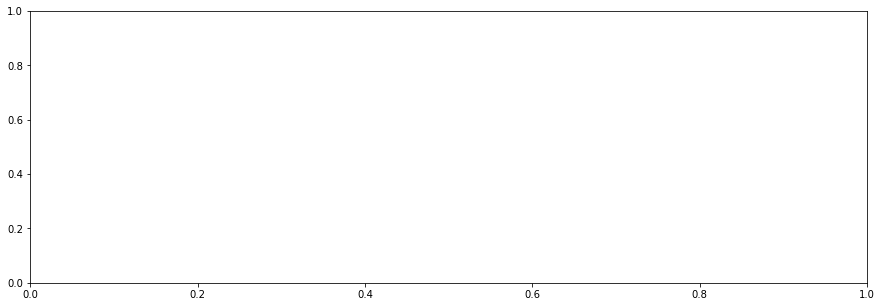

In [79]:
print(accuracy_values)
print('------------------------------')
print(loss_values)
plt.figure(figsize=(15, 5))
plt.plot(range(12), accuracy_values, color="green")
plt.plot(range(12), [float(value.detach()) for value in loss_values], color="blue")
plt.legend(["Accuracy", "Loss"])